#**Demostração - Aula 2**

#**Classificação de textos**

Para entender melhor o problema de classificação de textos, vamos começar com um exemplo básico que servirá como base para nos aprofundarmos depois.

In [14]:
import pandas as pd

df = pd.DataFrame({
    'text': [
      'Sobre MBA ? Eu gostei muito do MBA da FIAP',
      'O MBA da FIAP pode melhorar, não gostei muito'
    ],
    'class': [
        'positivo',
        'negativo'
    ]})

df

,text,class
0,Sobre MBA ? Eu gostei muito do MBA da FIAP,positivo
1,"O MBA da FIAP pode melhorar, não gostei muito",negativo


####**Para criar um modelo de classificação precisamos transformar os dados em uma linguagem a máquina entenda, qual é? como fazemos isso?**

Temos que transformar os dados/textos em números.


Podemos vetorizar os dados e ver como fica o espaço de características nesse caso. Vamos usar a mesma solução que vimos aula passada, porém agora dando nome para a técnica:

##BoW - Contagem de termos simples

**Vetorização** de contagem de termos, combinando com normalização e unigrama.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df.text)
count_vect = vect.transform(df.text)

print(pd.DataFrame(count_vect.toarray(), columns=vect.get_feature_names_out()).to_string())
#print(pd.DataFrame(count_vect.toarray(), columns=vect.get_feature_names_out()).T.to_string())

   da  do  eu  fiap  gostei  mba  melhorar  muito  não  pode  sobre
0   1   1   1     1       1    2         0      1    0     0      1
1   1   0   0     1       1    1         1      1    1     1      0


Usando Bigrama

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(2,2))
vect.fit(df.text)
count_vect = vect.transform(df.text)

print(pd.DataFrame(count_vect.toarray(), columns=vect.get_feature_names_out()).to_string())

   da fiap  do mba  eu gostei  fiap pode  gostei muito  mba da  mba eu  melhorar não  muito do  não gostei  pode melhorar  sobre mba
0        1       1          1          0             1       1       1             0         1           0              0          1
1        1       0          0          1             1       1       0             1         0           1              1          0


Usando Trigrama

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(3,3))
vect.fit(df.text)
count_vect = vect.transform(df.text)

print(pd.DataFrame(count_vect.toarray(), columns=vect.get_feature_names_out()).to_string())

   da fiap pode  do mba da  eu gostei muito  fiap pode melhorar  gostei muito do  mba da fiap  mba eu gostei  melhorar não gostei  muito do mba  não gostei muito  pode melhorar não  sobre mba eu
0             0          1                1                   0                1            1              1                    0             1                 0                  0             1
1             1          0                0                   1                0            1              0                    1             0                 1                  1             0


##TF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer(ngram_range=(1,1), use_idf=False, norm='l1')
vect.fit(df.text)
tf_vect = vect.transform(df.text)

print(pd.DataFrame(tf_vect.toarray(), columns=vect.get_feature_names_out()).to_string())

         da        do        eu      fiap    gostei       mba  melhorar     muito    não   pode     sobre
0  0.111111  0.111111  0.111111  0.111111  0.111111  0.222222     0.000  0.111111  0.000  0.000  0.111111
1  0.125000  0.000000  0.000000  0.125000  0.125000  0.125000     0.125  0.125000  0.125  0.125  0.000000


##TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer(ngram_range=(1,1), use_idf=True)
vect.fit(df.text)
tfidf_vect = vect.transform(df.text)

print(pd.DataFrame(tfidf_vect.toarray(), columns=vect.get_feature_names_out()).to_string())

         da        do        eu      fiap    gostei       mba  melhorar     muito       não      pode     sobre
0  0.267970  0.376623  0.376623  0.267970  0.267970  0.535941  0.000000  0.267970  0.000000  0.000000  0.376623
1  0.302531  0.000000  0.000000  0.302531  0.302531  0.302531  0.425196  0.302531  0.425196  0.425196  0.000000


Existe uma diferenca no cálculo original do TF-IDF apresentados pelos livros em relação ao padrão urilizado pelo Scikit Learn. A ideia dessa diferença é evitar divisões por zero.

Formúla original:

    TF-IDFw1 = TFw1 * IDFw1
    IDFw1 = loge(D/Dw1)
    D = total de documentos | Dw1 = Quantidade de documentos em que o termo aparece

----
Formúla do sklearn:
Muda o cálculo do IDFw1

    IDFw! = loge(1+D/1+Dw1)+1

Com o paâmetro smooth_idf=False

    IDFw! = loge(D/Dw1)+1



https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer


https://scikit-learn.org/stable/modules/feature_extraction.html

O cáculo do TF-IDF das classes TfidfTransformer e TfidfVectorizer do scikit-learn diferem ligeiramente da notação padrão de livros didáticos que define o IDF.


In [20]:
'''
tfidf_vect.data
tfidf_vect.A
vect.get_feature_names_out()
'''

'\ntfidf_vect.data\ntfidf_vect.A\nvect.get_feature_names_out()\n'

##Combinando as técnicas

In [21]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
import nltk
import string
nltk.download('stopwords')
nltk.download('punkt_tab')

# lista de stopwords do NLTK
stopwords = nltk.corpus.stopwords.words('portuguese')

# lista de stopwords customizada
stopwords_new = [x for x in stopwords if x not in ('muito','não')]
stopwords_new = stopwords_new + ["mba", "fiap"]

# função que remove pontuação
def remove_punctuation(text):
    punctuations = string.punctuation
    table = str.maketrans({key: " " for key in punctuations})
    text = text.translate(table)
    return text

remove_punctuation("Exemplo$ xx de 12 normalização, deixa o não!!")

# função que normaliza o texto e remove stopwords
def normalize_str(text):
    text = text.lower()
    text = remove_punctuation(text)
    text = "".join([w for w in text if not w.isdigit()])
    text = word_tokenize(text)
    text = [x for x in text if x not in stopwords_new]
    text = [y for y in text if len(y) > 2]
    return " ".join([t for t in text])
    #return text

normalize_str("Exemplo$ xx de 12 normalização, deixa o não!!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


'exemplo normalização deixa não'

In [23]:
df['text_trat'] = df.text.apply(normalize_str)

In [24]:
df['tokens'] = df.text_trat.apply(word_tokenize)

In [25]:
from nltk.stem.rslp import RSLPStemmer
import nltk
nltk.download('rslp')

rslp = RSLPStemmer()

def stem_pandas(line):
  return ' '.join([rslp.stem(token) for token in line])

df['stemmer'] = df.tokens.apply(stem_pandas)

df.head()

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


,text,class,text_trat,tokens,stemmer
0,Sobre MBA ? Eu gostei muito do MBA da FIAP,positivo,sobre gostei muito,"[sobre, gostei, muito]",sobr gost muit
1,"O MBA da FIAP pode melhorar, não gostei muito",negativo,pode melhorar não gostei muito,"[pode, melhorar, não, gostei, muito]",pod melhor não gost muit


In [26]:
vect = TfidfVectorizer()
#vect = TfidfVectorizer(ngram_range=(1,2), use_idf=True)
vect.fit(df.stemmer)

text_vect = vect.transform(df.stemmer)

print('UNIGRAMAS sem STOPWORDS e TEXTO COM STEMMER aplicado', text_vect.shape[1])
print(pd.DataFrame(text_vect.toarray(), columns=vect.get_feature_names_out()).to_string())

UNIGRAMAS sem STOPWORDS e TEXTO COM STEMMER aplicado 6
       gost    melhor      muit       não       pod      sobr
0  0.501549  0.000000  0.501549  0.000000  0.000000  0.704909
1  0.355200  0.499221  0.355200  0.499221  0.499221  0.000000


**Alternativa para lista de Stop-Words mais completa**

---


In [27]:
#!pip install spacy
!python -m spacy download pt_core_news_sm --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 70.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [28]:
## lista de stopwords do NLTK
import nltk
nltk.download('stopwords')
stopwords_nltk = nltk.corpus.stopwords.words('portuguese')
print("Stop-Words NLTK: ", len(stopwords_nltk))

## lista de stopwords do Spack
import spacy
nlp = spacy.load('pt_core_news_sm')
stopwords_spacy = nlp.Defaults.stop_words
print("Stop-Words Spacy: ", len(stopwords_spacy))

# Carrega as stopwords do SpaCy e NLTK combinadas
stopwords = list(set(nlp.Defaults.stop_words).union(set(nltk.corpus.stopwords.words('portuguese'))))
print("Stop-Words Spacy + NLTK: ", len(stopwords))

# agora é só usar igual vimos antes, façam os testes!

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stop-Words NLTK:  207
Stop-Words Spacy:  416
Stop-Words Spacy + NLTK:  500


##**Modelo com n-grama**
---

In [29]:
import pandas as pd

df = pd.DataFrame({
    'text': [
      'Sobre MBA ? Eu gostei muito do MBA da FIAP',
      'O MBA da FIAP pode melhorar, não gostei muito',
      'O curso pode melhorar'
    ],
    'class': [
        'positivo',
        'negativo',
        'negativo'
    ]})

In [30]:
df['class']

,class
0,positivo
1,negativo
2,negativo


###Transformando os textos/dados em uma "linguagem" para o modelo

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer()
vect.fit(df.text)
tfidf_vect = vect.transform(df.text)

print(pd.DataFrame(tfidf_vect.toarray(), columns=vect.get_feature_names_out()).to_string())

      curso        da        do        eu      fiap    gostei       mba  melhorar     muito       não      pode     sobre
0  0.000000  0.275379  0.362091  0.362091  0.275379  0.275379  0.550759  0.000000  0.275379  0.000000  0.000000  0.362091
1  0.000000  0.338470  0.000000  0.000000  0.338470  0.338470  0.338470  0.338470  0.338470  0.445047  0.338470  0.000000
2  0.680919  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.517856  0.000000  0.000000  0.517856  0.000000


###Treinando um modelo de Árvore de Decisão


In [32]:
# treinando um modelo de árevore de decisão
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(tfidf_vect, df['class'])

print('D Tree: ', tree.score(tfidf_vect, df['class'])) # retorna a acurracy - precisão do modelo

D Tree:  1.0


In [33]:
#tree.score(tfidf_vect, df['class'])

# na prática, temos que validar o modelo com a base de teste, aqui é só um exemplo e não estamos usando uma amostragem completa.
# vamos praticar mais em um exercício

###Aplicando o conhecimento do modelo em um novo documento

In [34]:
doc_valid = ['o curso tem oportunidade de melhorar, não gostei']

#função normalização

vetor = vect.transform(doc_valid)
print(pd.DataFrame(vetor.toarray(), columns=vect.get_feature_names_out()).to_string())

print('D Tree: ', tree.predict(vetor))

      curso   da   do   eu  fiap    gostei  mba  melhorar  muito       não  pode  sobre
0  0.562829  0.0  0.0  0.0   0.0  0.428046  0.0  0.428046    0.0  0.562829   0.0    0.0
D Tree:  ['negativo']


# **Montando nossa amostra**

---

In [35]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# mostrar a estrutura de pastas do google drive montado
!ls -la
!ls -la gdrive/MyDrive/FIAP/NLP/dados # aqui é o diretório do professor, coloquem o diretório de vocês

Mounted at /content/gdrive
total 20
drwxr-xr-x 1 root root 4096 May  7 00:36 .
drwxr-xr-x 1 root root 4096 May  7 00:31 ..
drwxr-xr-x 4 root root 4096 May  5 13:39 .config
drwx------ 7 root root 4096 May  7 00:36 gdrive
drwxr-xr-x 1 root root 4096 May  5 13:40 sample_data
total 1514427
-rw------- 1 root root 929305948 Mar 11  2020 cbow_s300.zip
-rw------- 1 root root  83392514 Feb 23  2022 complaints-2021-05-14_08_16_.json
-rw------- 1 root root      8365 Dec  9 17:10 contexto_rag_chatbot.txt
-rw------- 1 root root 127066935 Mar 29  2020 imdb-reviews-pt-br.csv
-rw------- 1 root root   3776170 Mar 29  2020 produtos.csv
-rw------- 1 root root 203269084 Jun 11  2020 pt.zip
-rw------- 1 root root   5592702 Nov  8  2022 reviews_apps_completa.csv
-rw------- 1 root root   2890644 Nov  8  2022 reviews_apps.csv
-rw------- 1 root root  62690718 Jun 16  2022 tickets_complaint_classified_en.csv
-rw------- 1 root root  33020135 Jun 18  2022 tickets_reclamacoes_classificados.csv
-rw------- 1 root ro

### Selecioando dados aleatórios direto do arquivo:

In [36]:
import pandas as pd

df = pd.read_csv(
    "gdrive/MyDrive/FIAP/NLP/dados/produtos.csv",
    delimiter=";",
    encoding='utf-8'
  ).sample(frac=0.5, random_state=42)

df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']
df.describe()

#df.sample(frac=0.5, random_state=42)

,nome,descricao,categoria,texto
count,1424,1424,1424,1424
unique,1307,1257,4,1320
top,Boneco Dragon Ball Z Son Gokou,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,livro,Boneco Dragon Ball Z Son Gokou Produto novo
freq,11,19,411,11


In [37]:
'''
df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8'
  ).sample(frac=0.5, random_state=42)
'''

'\ndf = pd.read_csv(\n    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding=\'utf-8\'\n  ).sample(frac=0.5, random_state=42)\n'

In [38]:
'''
df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8'
  ).sample(1000)
'''

'\ndf = pd.read_csv(\n    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding=\'utf-8\'\n  ).sample(1000)\n'

### Divisão do dataframe em amostras de treino e teste:

In [39]:
import pandas as pd

df = pd.read_csv("https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8')

df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']

df.describe()

,nome,descricao,categoria,texto
count,2916,2916,2916,2916
unique,2584,2460,4,2646
top,Mais Escuro - Cinquenta Tons Mais Escuros Pel...,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,livro,Boneco Dragon Ball Z Son Gokou Produto novo
freq,20,39,838,20


In [40]:
from sklearn.model_selection import train_test_split

# divisão da amostra entre treino e teste
df_train, df_test = train_test_split(
      df,
      test_size = 0.3,
      #test_size = 0.2,
      random_state = 42
  )

Analisando a distribuição das amostras em relação ao total

In [41]:
print("Original")
print(df.categoria.value_counts())
print("\nTreino")
print(df_train.categoria.value_counts())
print("\nTeste")
print(df_test.categoria.value_counts())

Original
categoria
livro        838
maquiagem    788
brinquedo    668
game         622
Name: count, dtype: int64

Treino
categoria
livro        577
maquiagem    558
brinquedo    478
game         428
Name: count, dtype: int64

Teste
categoria
livro        261
maquiagem    230
game         194
brinquedo    190
Name: count, dtype: int64


In [42]:
print("Original")
print(df.categoria.value_counts()/df.shape[0])
print("\nTreino")
print(df_train.categoria.value_counts()/df_train.shape[0])
print("\nTeste")
print(df_test.categoria.value_counts()/df_test.shape[0])

Original
categoria
livro        0.287380
maquiagem    0.270233
brinquedo    0.229081
game         0.213306
Name: count, dtype: float64

Treino
categoria
livro        0.282705
maquiagem    0.273395
brinquedo    0.234199
game         0.209701
Name: count, dtype: float64

Teste
categoria
livro        0.298286
maquiagem    0.262857
game         0.221714
brinquedo    0.217143
Name: count, dtype: float64


<Axes: xlabel='categoria'>

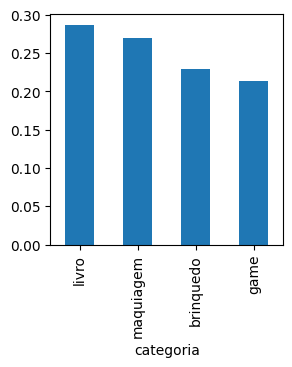

In [43]:
(df.categoria.value_counts()/df.shape[0]).plot(kind='bar', figsize=(3,3))

# **Montando um pipeline simples**

---

Data Loader > Text Normalization > Text Vectorization > Estimator

Trestando o modelo de uma forma mais simples

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# carregar dataframe
df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8'
  )

# limpeza inicial (normalização)
df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']

# divisão da amostra entre treino e teste
df_train, df_test = train_test_split(
      df,
      test_size = 0.3,
      random_state = 42
  )

# Técnicas de pré-processamento (normalização, stopwords, lematização e outras)

# vetorização do dataframe de treino
vect = CountVectorizer()
vect.fit(df_train.texto)

x_train = vect.transform(df_train.texto)
y_train = df_train["categoria"]

# treinamento do modelo ávore de decisão com o dataframe de treino
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# transforma o dataframe de teste em vetor (features)
x_test = vect.transform(df_test.texto)

# escoragem da classificação na amostra de teste
y_prediction = model.predict(x_test)

# mensuração do resultado pela acurácia
y_test = df_test["categoria"]
accuracy = accuracy_score(y_prediction, y_test)
print(accuracy)

0.9565714285714285


In [45]:
print(" ")
print(x_train.shape)
print(x_test.shape)

 
(2041, 29957)
(875, 29957)


In [46]:
vect.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [47]:
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

#**Outros modelos de classificação**
---
<br>

###O ***Scikit-Learn*** nos permite explorar mais modelos de classificação além da Árvore de Decisão (DecisionTreeClassifier), veja:
<br>

- Regressão Logistica (LogisticRegression)
- Random Forest (RandomForestClassifier)
- Naive Bayes (MultinomialNB e BernoulliNB)

Entre outros...

In [48]:
# Modelos de Regressão
from sklearn.linear_model import LogisticRegression

# Random Forest (baseados em Ávores de Decisões)
from sklearn.ensemble import RandomForestClassifier

# Naive Bayes, bastante utilizado para classificar textos baseado na frequência das palavras independnetemente do contexto (classificação de SPAM)
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

https://scikit-learn.org/stable/modules/linear_model.html

https://scikit-learn.org/stable/modules/naive_bayes.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier



#**Exercícios - Aula 2**

Dado o dataset de produtos [1], desenvolva os seguintes pipelines:

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv

Obs.: em todos os pipelines use:
- normalização renovendo valores faltantes
- criem uma nova coluna concatenando as colunas nome e descrição.
- randon_state igual a 42 para permitir a comparação com seus colegas e separe uma amostra de 30% para teste.


In [49]:
import pandas as pd

df = pd.read_csv("https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8')

**1. ) Treine um modelo de classificação DecisionTreeClassifier do pacote scikit-learn para classificar os produtos em suas categorias, com as seguintes configurações usando a nova coluna (nome + descricao):**

- 1.1 Contagem de termos simples com unigrama e sem stop-words.
- 1.2 Contagem de termos simples com unigrama + brigrama e sem stop-words.
- 1.3 TF-IDF com unigrama e com stop-words.
- 1.4 TF-IDF com unigrama e sem stop-words.
- 1.5 TF-IDF com unigrama e sem stop-words em textos lematizados (Dica: crie uma função para lematizar o texto usando o Spacy).

In [50]:
# respostas

**2. ) Treine um modelo de classificação LogisticRegression do pacote scikit-learn para classificar os produtos em suas categorias, com as seguintes configurações:**

- 2.1 Contagem de termos simples com unigrama e com stop-words.
- 2.2 Contagem de termos simples com unigrama + brigrama e sem stop-words.
- 2.3 TF-IDF com unigrama e sem stop-words.
- 2.4 TF-IDF com unigrama e sem stop-words em textos lematizados.

Extra:
- 2.5 Contagem de termos simples (BoW) com unigrama, sem stop-words (combinando Spacy e NLTK) em textos com apenas verbos lematizados.

Dica: crie uma função para lematizar o texto usando o Spacy, não esqueça de usar o POS-Tag quando necessário.

In [51]:
# reposta

#**Simulando a "produtização" de um pipe line**

Pipeline do modelo campeão:

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# carregar dataframe
df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8'
  )

# limpeza inicial (normalização)
df.dropna(inplace=True)
df["texto"] = df['nome'] + " " + df['descricao']

# divisão da amostra entre treino e teste
df_train, df_test = train_test_split(
      df,
      test_size = 0.3,
      random_state = 42
  )

# vetorização do dataframe de treino
vect = CountVectorizer()
vect.fit(df_train.texto)
x_train = vect.transform(df_train.texto)
y_train = df_train["categoria"]

# treinamento do modelo ávore de decisão com o dataframe de treino
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

# transforma o dataframe de teste em vetor (features)
x_test = vect.transform(df_test.texto)

# escoragem da classificação na amostra de teste
y_prediction = model.predict(x_test)

# mensuração do resultado pela acurácia
y_test = df_test["categoria"]
accuracy = accuracy_score(y_prediction, y_test)
print(accuracy)

0.9817142857142858


In [53]:
texto = """
Maleta Exclusiva Ruby Rose Profissional Completa.
"""

vetor = vect.transform([texto])
y_prediction = model.predict(vetor)
y_prediction

array(['maquiagem'], dtype=object)

Salvando o modelo treinado e o vetor de transformação.

In [54]:
vect
model

LogisticRegression(random_state=42)

In [55]:
!ls -la

total 20
drwxr-xr-x 1 root root 4096 May  7 00:36 .
drwxr-xr-x 1 root root 4096 May  7 00:31 ..
drwxr-xr-x 4 root root 4096 May  5 13:39 .config
drwx------ 7 root root 4096 May  7 00:36 gdrive
drwxr-xr-x 1 root root 4096 May  5 13:40 sample_data


In [56]:
import pickle

pickle.dump(vect, open('vetorizador.pkl', 'wb'))
pickle.dump(model, open('classificador.pkl', 'wb'))

In [57]:
!ls -la

total 1388
drwxr-xr-x 1 root root   4096 May  7 00:36 .
drwxr-xr-x 1 root root   4096 May  7 00:31 ..
-rw-r--r-- 1 root root 959404 May  7 00:36 classificador.pkl
drwxr-xr-x 4 root root   4096 May  5 13:39 .config
drwx------ 7 root root   4096 May  7 00:36 gdrive
drwxr-xr-x 1 root root   4096 May  5 13:40 sample_data
-rw-r--r-- 1 root root 438142 May  7 00:36 vetorizador.pkl


In [58]:
# app_main.py

import pickle

vetorizador_bla = pickle.load(open('vetorizador.pkl', 'rb'))
modelo_classificador_bla = pickle.load(open('classificador.pkl', 'rb'))

texto = """
Maleta Exclusiva Ruby Rose Profissional Completa.
"""

texto_vetor = vetorizador_bla.transform([texto])

categoria_predita = modelo_classificador_bla.predict(texto_vetor)

In [59]:
categoria_predita

array(['maquiagem'], dtype=object)

Salvando no google drive

In [60]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# mostrar a estrutura de pastas do google drive montado
!ls -la

Mounted at /content/gdrive
total 1388
drwxr-xr-x 1 root root   4096 May  7 00:36 .
drwxr-xr-x 1 root root   4096 May  7 00:31 ..
-rw-r--r-- 1 root root 959404 May  7 00:36 classificador.pkl
drwxr-xr-x 4 root root   4096 May  5 13:39 .config
drwx------ 7 root root   4096 May  7 00:36 gdrive
drwxr-xr-x 1 root root   4096 May  5 13:40 sample_data
-rw-r--r-- 1 root root 438142 May  7 00:36 vetorizador.pkl


In [61]:
# Exemplo salvando no google drive
import pickle

pickle.dump(model, open('/content/gdrive/My Drive/minhaarvore.pkl', 'wb'))
pickle.dump(vect, open('/content/gdrive/My Drive/vetorizador.pkl', 'wb'))